# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [1]:
library(kohonen)
library(corrplot)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

corrplot 0.84 loaded



     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

### Ejercicio 1: 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.



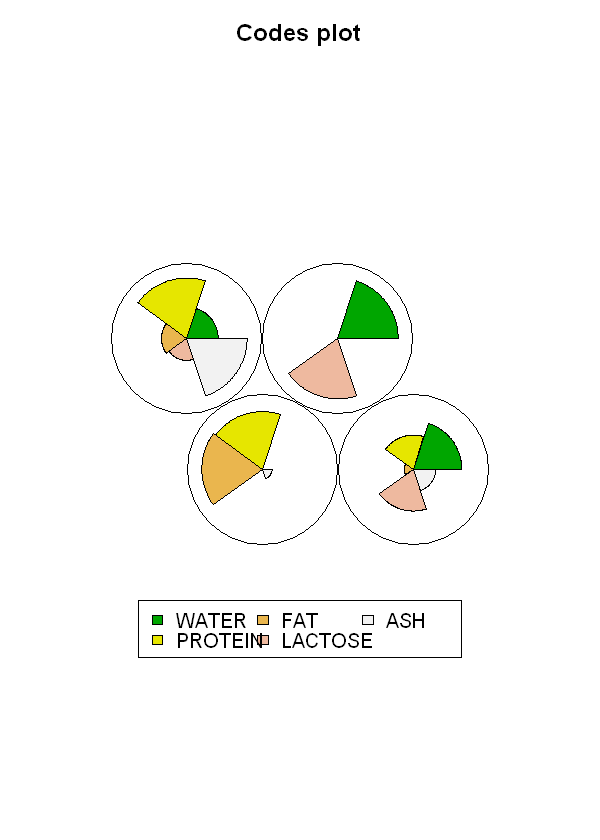

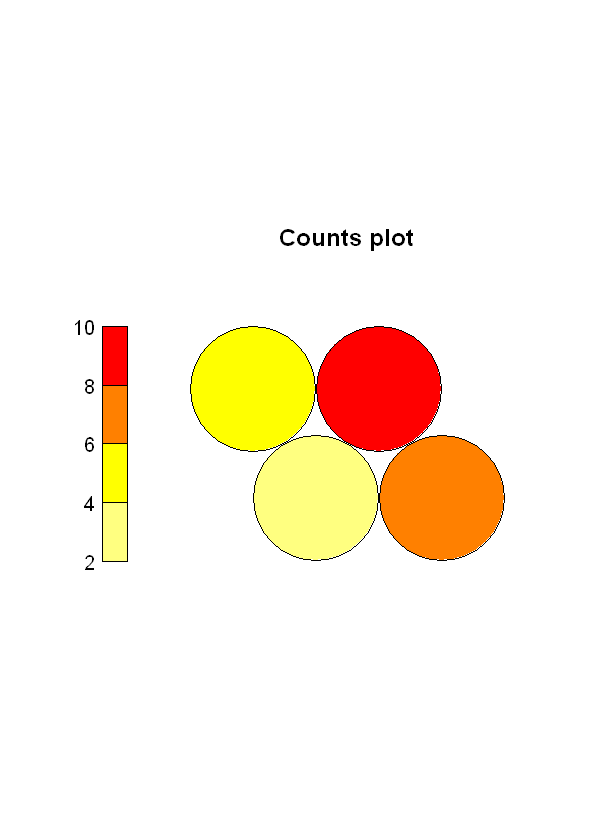

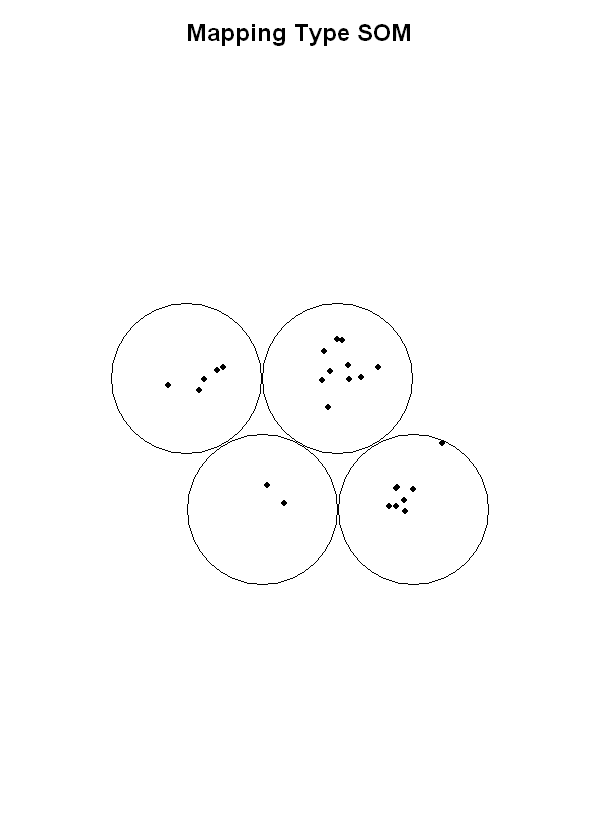

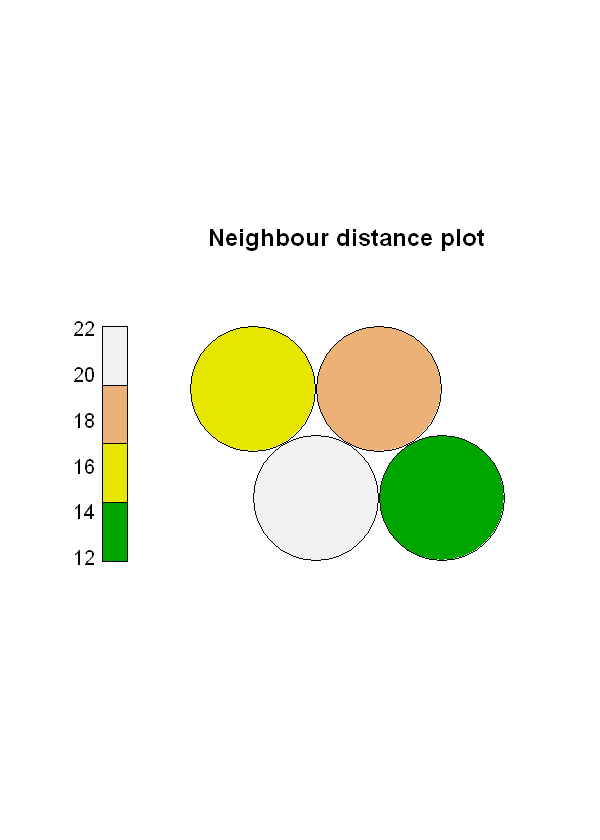

In [128]:
#create SOM grid
set.seed(1)

sommap <- supersom(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


SOM es otro método que permite analizar datos de alta dimensionalidad en un plano bidimensional, realizando agrupación de datos por sus similaridades de acuerdo a la distancia euclideana de las observaciones. Su procesamiento parte de valores aleatorios que se van optimizando hasta formar vecindades. Los grupos adyacentes comparten cierta similitud.

Entre los parámetros de entrada recibe:
   * data   = Datos en forma matricial, cada fila un elemento.
   * grid   = Componente principal del método, define la cantidad y forma de agrupamiento a generar. Se basa en un tipo de somgrid.
   * rlen   = la cantidad de veces que se presentará (entrenará) la data.
   * alpha  = learning rate, cuánto varía en cada iteración.
   * radius = radio de cada conjunto sobre el cual agrupará.
   * entre otros.
   
Por otro lado, los distintos gráficos permiten interpretar de distinta forma la misma data agrupada.
* El primero, mediante gráficos de "área" busca visualizar la proporción entre las variables del grupo.
* Counts plot por su parte refleja la cardinalidad de los grupos, con un color más rojo aquellos más poblados.
* Mapping permite visualizar la distancia euclideana entre los miembros de un grupo, reflejando el valor medio y su varianza.
* En el último, podemos observar con colores la distancia anterior, mientras mayor sea la densidad o agrupación de elementos, tendrá un tono más verde, al contrario, si están muy dispersos se le asigna un tono más claro.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

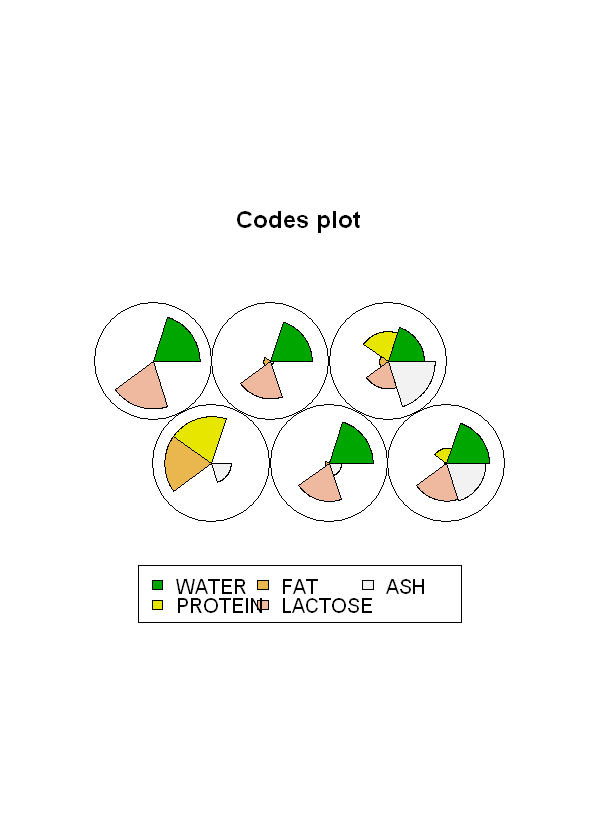

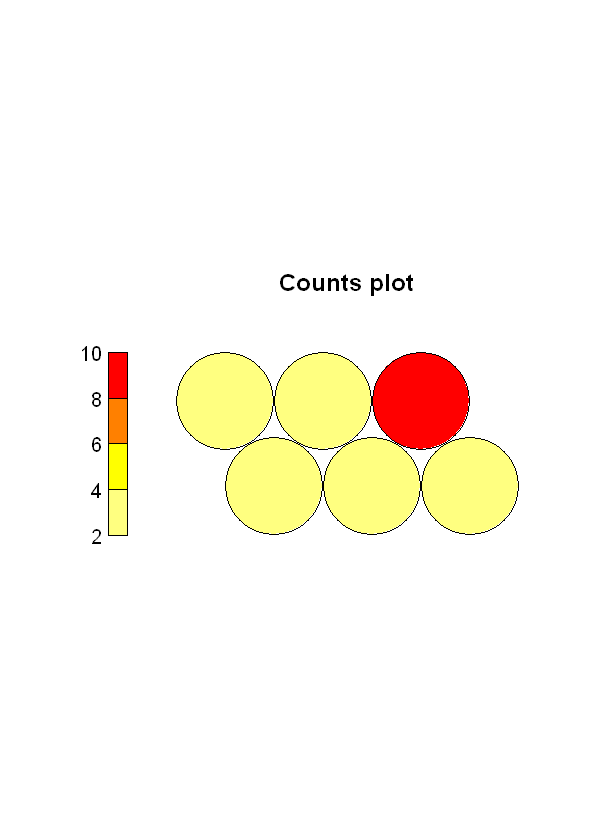

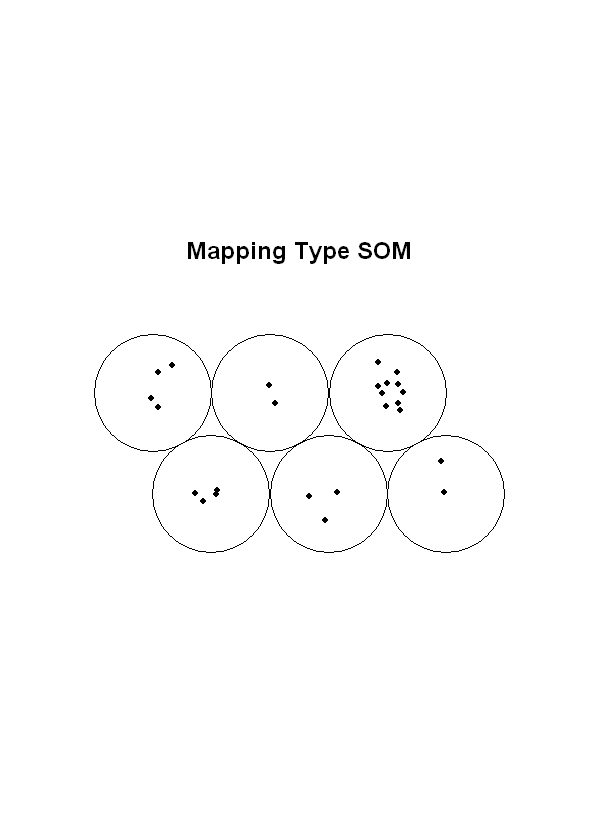

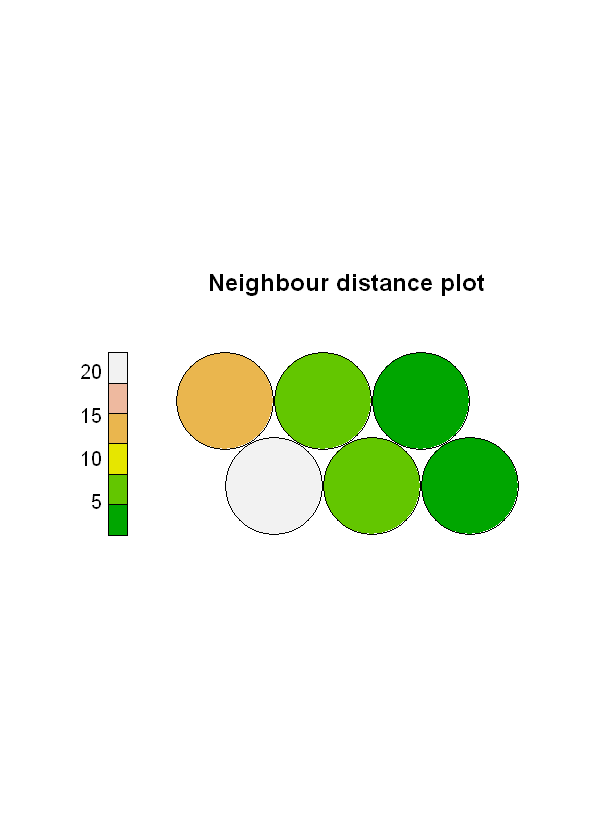

In [129]:
#create SOM grid
set.seed(1)
sommap <- som(scale(datos), grid = somgrid(3, 2, "hexagonal"),rlen=2)
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

En esta oportunidad se cambiaron los parámetros (partiendo de una misma semilla) para solicitar una agrupación en 6 subconjuntos, después de ser entrenada dos veces con toda la data. Este cambio produjo una distribución más homogénea de las proporciones observadas en el primer gráfico, a su vez que disminuye la distancia general entre los elementos, como se puede visualizar en el gráfico 4.

---

Warning message in matrix(sommap$codes[[1]], ncol = 4, nrow = 4, byrow = FALSE):
"data length [30] is not a sub-multiple or multiple of the number of rows [4]"


ERROR: Error in if (abs(dloc[2]) < 0.1) {: missing value where TRUE/FALSE needed


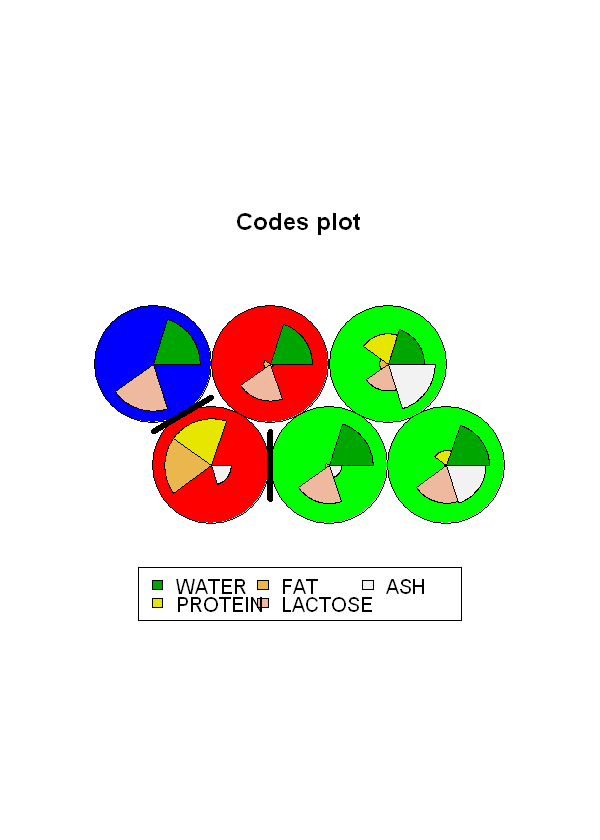

In [78]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


### Ejercicio 2: 

#### a) Explique como funciona esta nueva visualización.


Tomando como base los grupos asociados a las proporciones entre variables, la nueva visualización realiza un arbol jerárquico de los grupos solicitados (en este caso 3) "agrupando" en un nuevo nivel los conjuntos anteriores, utilizando como referencia visual los nuevos colores que los envuelven. Las líneas negras en cambio, son otra ayuda visual que explicita el corte o separación jerárquica, pero sin quitar el hecho de que los conjuntos vecinos son más similares entre ellos que con sus pares lejanos.



#### b) Interprete y comente los resultados obtenidos. 

Al trabajar sobre los conjuntos similares, mientras menor sea la diferencia entre sus proporciones (variables más representativas) más cerca estarán y por tanto antes se agruparán de manera jerárquica. El corte del árbol, en este caso, se da cuando se logran formar 3 grandes grupos.

Los dos grupos verdes destacan por contener agua y lactora en proporciones muy altas en comparación a los otros dos grupos. Mientras que el destacado en rojo prioriza la grasa de la leche por sobre el ash.

---

### Ejercicio 3: 

a) De los datos en el archivo comunas.csv escoja un subconjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones, discuta sus resultados y proponga una estrategia gráfica para representarlos.

**Respuesta 3.a**

Para realizar el analisis del subconjunto de datos a escoger, se estudiara la correlacion de los datos socioeconomicos-salud que tienen las comunas de chile.

In [2]:
datos <- read.csv("comunas.csv",header=TRUE,sep=";",dec=".", check.names = FALSE, encoding="UTF-8")
head(datos)

,Region,Comuna,Poblacion(miles)2011,IDSE,Ingresos persona Mens(miles $)2006-11,Pobreza % 2006-11,Escolaridad (años) 2006-11,Material Vivienda bueno o acceptable % 2006,Alcantarillado o Fosa Sept. % 2006,Esperanza vida al nacer (años= 2005-10,Índice Desarrollo Humano,Tasa AVPP x 1000 h 2007-11,% defunc. 50+ años 2011,Mortalidad Infantil x 1000 NV 2009-11
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Iquique,186.0,0.698,227.6,10.2,11.1,81.8,98.8,77.2,0.631,82.1,73.0,8.9
2,1,Pica,18.6,0.604,188.1,12.2,9.6,71.0,94.0,77.5,0.572,23.0,45.8,9.8
3,1,Pozo Almonte,17.3,0.591,176.0,9.8,9.7,73.1,83.5,77.3,0.574,44.3,66.7,7.1
4,1,Alto Hospicio,93.8,0.577,166.3,20.9,10.1,65.9,98.4,78.1,0.555,46.7,56.2,4.9
5,1,Huara,3.4,0.382,161.4,10.0,7.6,49.0,38.9,81.8,0.592,55.8,44.4,8.9
6,2,Calama,148.8,0.717,269.3,8.5,10.9,85.0,98.9,76.2,0.625,87.2,63.4,9.7


Del grafico de correlacion podemos observar que existen variables que tienen diferentes escalas, por lo que armaremos 3 subconjuntos de datos y escogeremos los que tengan mejor correlacion. Estos grupos estaran divididos por su escala, Estos son:  

**Conjunto1**:
* Porcentaje de pobreza
* Porcentaje de material de vivienda bueno o malo
* Porcentaje de alcantarillado o fosa séptica
* Porcentaje de defuncion para personas mayores a 50 años)
  

**Conjunto 2** 
* Poblacion en miles de habitantes
* Ingreso Mensual por persona(miles $)
* Tasa de AVVP x1000 horas
* Mortalidad infantil X1000 NV

**Conjunto 3**
* IDSE
* Escolaridad
* Índice de desarrollo Humano
* Esperanza de vida al nacer)**

In [84]:
cor(x = datos[c(6,8,9,13)])

,Pobreza % 2006-11,Material Vivienda bueno o acceptable % 2006,Alcantarillado o Fosa Sept. % 2006,% defunc. 50+ años 2011
Pobreza % 2006-11,1.00000000,-0.37223780,-0.37905045,-0.04141319
Material Vivienda bueno o acceptable % 2006,-0.37223780,1.00000000,0.43900402,0.08159685
Alcantarillado o Fosa Sept. % 2006,-0.37905045,0.43900402,1.00000000,-0.02404145
% defunc. 50+ años 2011,-0.04141319,0.08159685,-0.02404145,1.00000000


In [7]:
cor(x = datos[, c(3,5,12,14)])

,Poblacion(miles)2011,Ingresos persona Mens(miles $)2006-11,Tasa AVPP x 1000 h 2007-11,Mortalidad Infantil x 1000 NV 2009-11
Poblacion(miles)2011,1.00000000,0.2851756,-0.1912213,-0.01077773
Ingresos persona Mens(miles $)2006-11,0.28517565,1.0000000,-0.2674553,-0.06280260
Tasa AVPP x 1000 h 2007-11,-0.19122134,-0.2674553,1.0000000,0.26114274
Mortalidad Infantil x 1000 NV 2009-11,-0.01077773,-0.0628026,0.2611427,1.00000000


In [8]:
cor(x = datos[, c(4,7,10,11)])

,IDSE,Escolaridad (años) 2006-11,Esperanza vida al nacer (años= 2005-10,Índice Desarrollo Humano
IDSE,1.0000000,0.9202550,0.3919693,0.9061464
Escolaridad (años) 2006-11,0.9202550,1.0000000,0.4096929,0.8613870
Esperanza vida al nacer (años= 2005-10,0.3919693,0.4096929,1.0000000,0.7005890
Índice Desarrollo Humano,0.9061464,0.8613870,0.7005890,1.0000000


ademas podemos ver esto graficamente.

 [1] "Poblacion(miles)2011"                       
 [2] "IDSE"                                       
 [3] "Ingresos persona Mens(miles $)2006-11"      
 [4] "Pobreza % 2006-11"                          
 [5] "Escolaridad (años) 2006-11"                 
 [6] "Material Vivienda bueno o acceptable % 2006"
 [7] "Alcantarillado o Fosa Sept. % 2006"         
 [8] "Esperanza vida al nacer (años= 2005-10"     
 [9] "Índice Desarrollo Humano"                   
[10] "Tasa AVPP x 1000 h 2007-11"                 
[11] "% defunc. 50+ años 2011"                    
[12] "Mortalidad Infantil x 1000 NV 2009-11"      


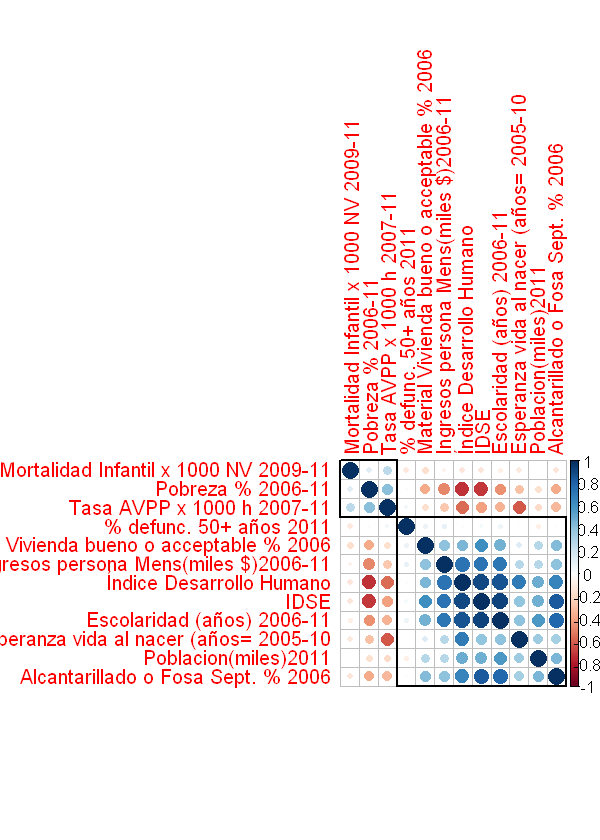

In [9]:
options(repr.plot.width = 5, repr.plot.height =7)
data_matrix <- as.matrix(datos[1:323,3:14])
cor_matrix <- cor(data_matrix)
print(colnames(data_matrix))
corrplot(cor_matrix, method = "circle", order = "hclust", addrect = 2)

De todo esto podemos ver que el grupo mejor correlacionado es el conjunto 3, el cual sera este el conjunto a ocupar para realizar nuestro analisis

**Respuesta 3.b**

In [3]:
subconjunto <- datos[, c(4,7,10,11)]
colnames(subconjunto) <- c('IDSE','Escol','EVN','IDH')
row.names(subconjunto) <- datos[,2]

In [11]:
head(subconjunto)

,IDSE,Escol,EVN,IDH
,<dbl>,<dbl>,<dbl>,<dbl>
Iquique,0.698,11.1,77.2,0.631
Pica,0.604,9.6,77.5,0.572
Pozo Almonte,0.591,9.7,77.3,0.574
Alto Hospicio,0.577,10.1,78.1,0.555
Huara,0.382,7.6,81.8,0.592
Calama,0.717,10.9,76.2,0.625


In [12]:
summary(subconjunto)

      IDSE            Escol             EVN             IDH        
 Min.   :0.2350   Min.   : 6.400   Min.   :68.10   Min.   :0.2390  
 1st Qu.:0.4655   1st Qu.: 8.100   1st Qu.:75.10   1st Qu.:0.4345  
 Median :0.5440   Median : 9.000   Median :76.40   Median :0.5070  
 Mean   :0.5444   Mean   : 9.093   Mean   :76.22   Mean   :0.5027  
 3rd Qu.:0.6200   3rd Qu.: 9.900   3rd Qu.:77.50   3rd Qu.:0.5615  
 Max.   :0.9920   Max.   :15.000   Max.   :82.20   Max.   :0.9910  

,IDSE,Escol,EVN,IDH
V1,-0.8133302,-0.7501876,-0.1484924,-0.6533147
V2,-1.0436191,-1.0211510,-1.7704233,-1.4835494
V3,0.2716417,0.1178946,0.1225692,0.2232503
V4,1.2376878,1.3246571,0.6997689,1.2111220


SOM of size 2x2 with a hexagonal topology and a bubble neighbourhood function.
The number of data layers is 1.
Distance measure(s) used: sumofsquares.
Training data included: 323 objects.
Mean distance to the closest unit in the map: 1.407.


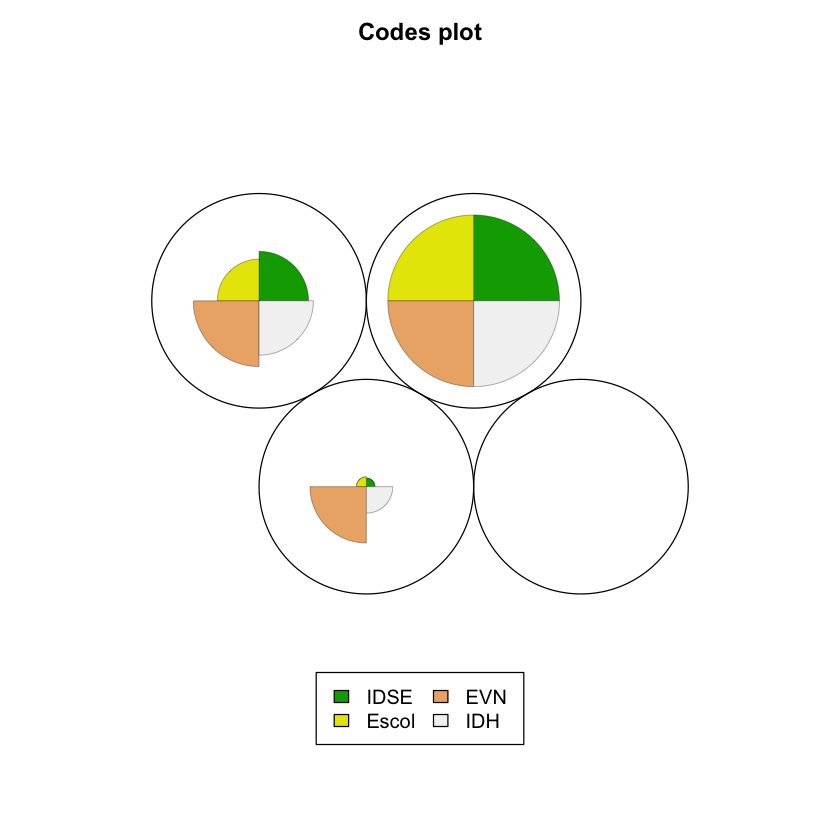

[1]  99  38 122  64


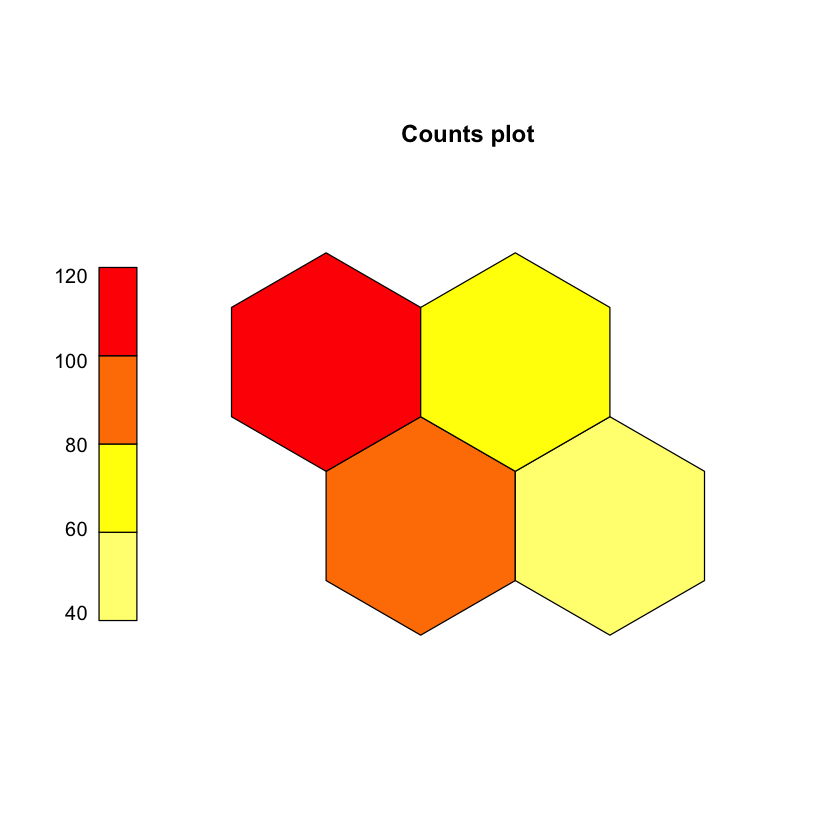

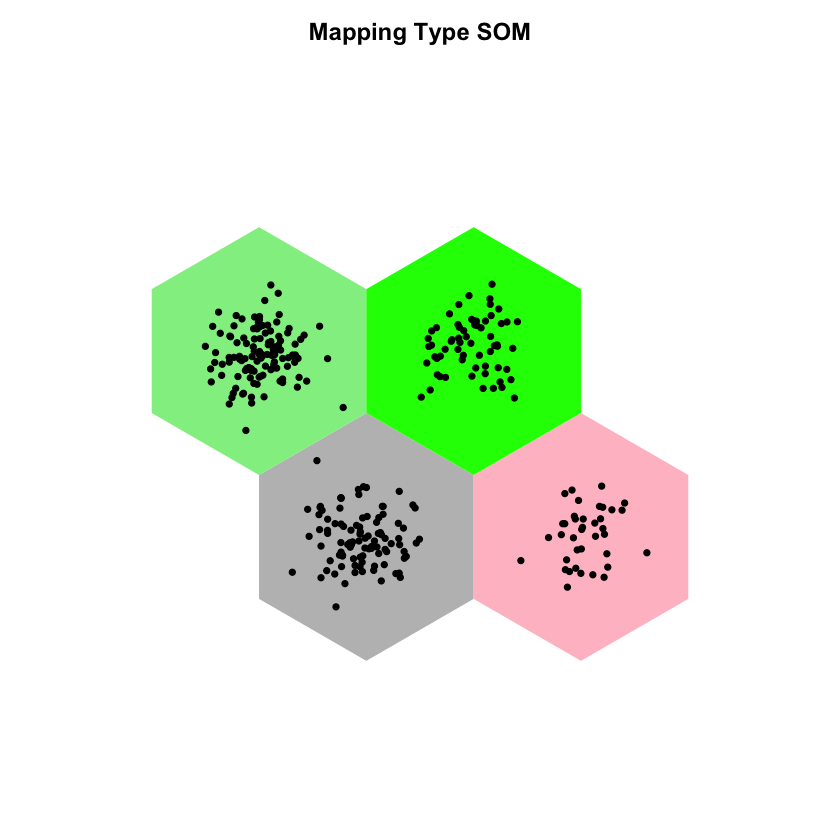

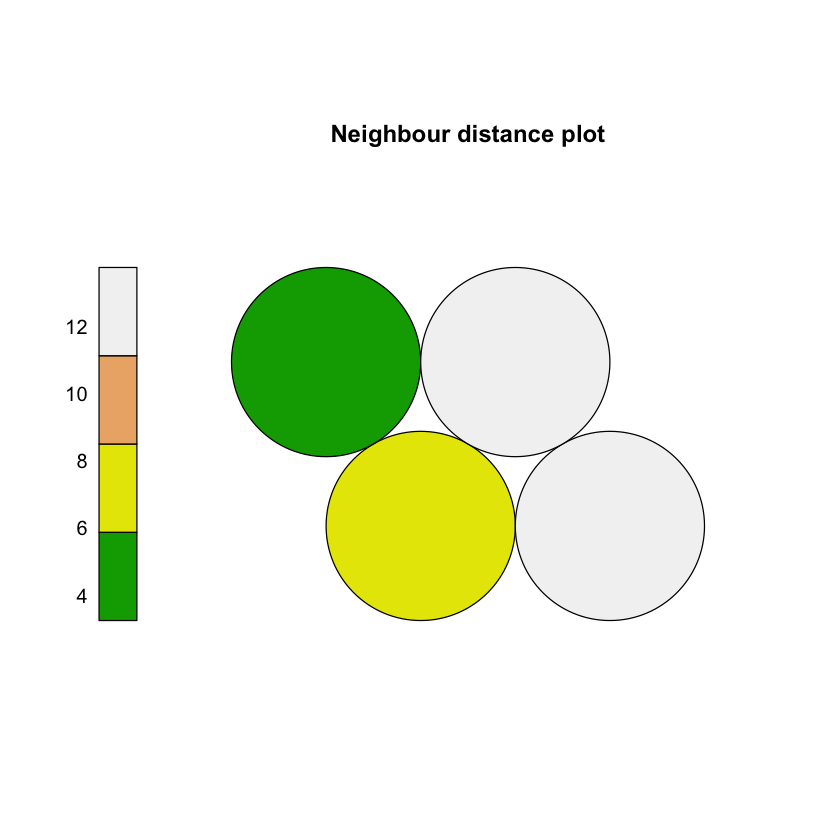

In [8]:
#create SOM grid
set.seed(1)
sommap <- som(scale(subconjunto), grid = somgrid(2, 2, "hexagonal"),rlen=2)
pesos<-sommap$codes
pesos
plot(sommap)

summary(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

countsData <- plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE, label, shape="straight")

print(countsData)

bgcols <- c("gray", "pink", "lightgreen", "green")

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM", bgcol = bgcols, shape = "straight", border = NA)

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

In [123]:
map(sommap, scale(subconjunto))

$unit.classif
  [1] 4 3 3 3 1 4 4 3 3 3 3 3 3 4 4 4 3 3 3 3 3 1 4 4 3 3 3 3 3 3 3 3 1 1 1 2 1
 [38] 4 4 4 4 4 3 4 4 3 4 4 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 [75] 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 1 1 1 2 1 1 3 4 1 3 1
[112] 1 3 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 4 4 4 4 4 4 3 3 3 3 3 1 3
[149] 1 1 3 3 2 2 1 2 1 1 1 1 1 1 2 1 2 1 2 1 1 1 2 1 1 1 2 1 1 1 2 2 1 1 2 2 2
[186] 2 2 2 4 3 3 3 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 1 2 2 2 3 3
[223] 3 3 3 3 3 3 3 1 3 3 3 3 1 1 1 1 1 1 1 1 2 2 1 2 1 2 4 3 3 2 2 4 4 3 3 4 4
[260] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 3 3 3 3 3 3 3 3
[297] 3 3 3 3 3 3 3 3 3 3 3 3 1 4 3 2 1 3 1 1 1 1 1 1 1 2 4

$distances
  [1]  0.09715541  0.55216208  0.49118306  1.09115699 10.63660221  0.56195660
  [7]  0.63201800  7.22634466  2.21645827  3.11568746  3.10237612  4.47862261
 [13]  3.52410537  0.61652862  0.07931421  0.53588705  0.94860602  0.28001707
 [19]  0.44794147  0.17879897  0.26181286  0.97694469  0.31209476  0.59483718
 [25]  0.35224389  1.01658392  1.97417094  0.69485964  1.11811889  1.19787791
 [31]  0.45081364  7.84926575  3.25487983  2.47234449  1.51736041  0.22151332
 [37]  0.88516153  0.49121191  0.78784453  1.63240992  0.13312280  0.49536675
 [43]  1.69403112  1.27844935  0.43180405  0.81784910  0.61350258  4.14691091
 [49]  2.35231299  0.59490988  0.92489026  0.41871194  0.11804909  0.19123181
 [55]  1.59543984  1.52759988  0.40894453  0.85298919  0.16541570  0.21665275
 [61]  0.24369668  0.76215111  0.29910586  0.89344348  1.60763662  1.05329270
 [67]  0.77548625  0.70098572  1.24603630  1.21430922  1.14391858  0.44406789
 [73]  0.72081694  0.34716232  0.60323642  0.95799699  0.40219396  0.30109780
 [79]  0.03044054  0.27196525  0.05610039  0.43315302  0.23853145  0.36544565
 [85]  0.05027248  0.19149721  0.06860139  1.27951785  0.47557822  0.34613359
 [91]  0.45980850  0.37711284  0.59608254  0.79841937  0.39161562  0.87071325
 [97]  1.70951350  0.83095705  0.36622661  0.52679101  0.82118676  0.73933946
[103]  0.27297945  0.21164823  0.81881400  1.15538753  0.78287807  0.69368287
[109]  1.27149243  1.40346386  0.81730157  2.80949140  0.55708383  1.25242443
[115]  1.05802936  0.19970619  0.69683732  0.18397545  0.15077739  0.22679441
[121]  0.04636349  0.25878265  0.15814028  0.51887771  0.47416953  0.18136182
[127]  0.45642349  0.16908963  0.10000222  1.38764895  1.54711248  0.53416540
[133]  0.85665556  0.89119370  1.59689185  0.94695874  0.20652679  0.10068534
[139]  0.31870665  0.62542608  0.84240840  0.82175541  0.24459427  0.41722707
[145]  0.54914202  0.32167165  1.09035609  0.55367512  0.70805897  0.78335619
[151]  0.76274530  0.89880730  0.78087062  5.41292133  0.23187390  1.65200302
[157]  0.71185214  1.38851353  0.70000054  0.61760374  1.09251142  1.27243367
[163]  0.59998686  0.24120841  0.45547884  0.52112935  0.33307095  0.14644938
[169]  0.30220881  0.36950529  0.76320734  0.96632307  0.74666759  0.85950197
[175]  0.13118821  0.27461743  0.40841303  1.26449797  0.29589686  1.47954714
[181]  1.16383075  1.18644018  0.48668986  0.57528783  0.65307134  1.15289175
[187]  3.41108392  4.15014639  0.17149056  1.27199353  0.40848143  0.43760214
[193]  0.42647212  0.28752159  0.47746762  0.73816947  0.19177192  0.75038092
[199]  0.48342031  0.26658185  0.73146005  0.14422553  0.52778573  0.36166530
[205]  0.96632469  0.87141429  0.45482034  0.31362065  1.19478506  1.22963909
[211]  1.26558322  1.56442685  1.06611511  1.43155111  1.49971196  1.60181367
[217]  1.99238732  2.49165953  2.75413068  2.27555236  0.33604592  0.30560029
[223]  1.87499519  0.79034948  0.07509159  3.28576736  0.08589819  1.67812209
[229]  0.71877332  2.91623104  0.90954175  0.38073849  0.63417832  0.63791833
[235]  0.95544815  1.23309408  0.68267906  0.76337332  0.53998827  0.74933254
[241]  0.53002717  0.67760447  0.86242497  0.43187637  0.67128561  3.05408802
[247]  1.25338531  9.22086594  0.54189975  2.72043260  1.14121125  5.3184274

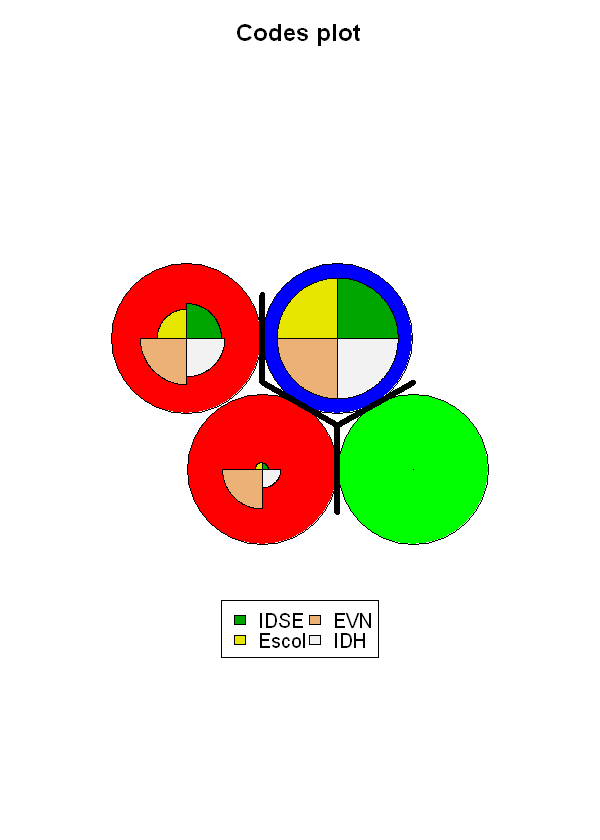

In [90]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)
